# Rendimiento del estudiante

### 1. Declaración del problema
Este proyecto busca comprender cómo el rendimiento del estudiante(puntuaciones de prueba) se ve afectado por otras variables como género, etnia, nivel educativo de los padres, almuerzo y curso de preparación para la prueba

### 2. Recipilación de datos
Fuente del conjunto de datos - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977 

### 2.1 Importacion de datos y paquetes requeridos

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importar los datos CSV como un DataFrame de pandas

In [3]:
df = pd.read_csv('StudentsPerformance.csv')

Mostrar las 5 primeras filas del DataFrame

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2.2 Información del Dataset
- **gender**: Sexo de los estudiantes(femele/male)
- **race/ethnicity**:Etnia de los estudiantes(group A,B,C,D,E)
- **parental level of education**: Nivel educativo final de los padres(bachelor's degree, some college, master's degree, associate's degree, high school, some high school)
- **lunch** : El tipo de almuerzo que tuvieron los estudiantes antes de la prueba (standard, free/reduced)
- **test preparation course** : si completaron o no un curso de preparacion antes de la prueba(none, completed)
- **math score**
- **reading score**
- **writing score**

### 3. Verificaciones de datos a realizar:
- Verificar valores faltantes
- Verificar duplicados
- Verificar tipo de datos
- Verificar el numero de valores únicos de cada columna
- Verificar estadísticas del conjunto de datos
- Verificar las diversas categorías presentes en las diferentes columnas categoricas

#### 3.1 Verificar valores faltantes

In [ ]:
df.isna().sum()

No se encontraron valores faltantes en el set de datos

#### 3.2 Verificar duplicados

In [9]:
df.duplicated().sum()

0

No se encontraron valores duplicadas en el set de datos

#### 3.3 Verificar tipo de datos

In [ ]:
df.info()

#### 3.4 Verificar el número de valores unicos de cada columna

In [ ]:
df.nunique()

#### 3.5 Verificar estadísticas del conjunto de datos

In [ ]:
df.describe()

Análisis:
- La media de todos los datos numéricos son muy similares, estan en un rango de entre 66 y 68.05
- Las desviaciones estándar tambien son parecidas, oscilan entre 14.6 y 15.19
- La puntuación minina en matematicas es 0, en escritura 10 y en lectura 17

#### 3.6 Explorando datos

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
print('categories in "gender" variable: ',end=' ')
print(df['gender'].unique())

print('categories in "race/ethnicity" variable: ',end=' ')
print(df['race/ethnicity'].unique())

print('categories in "parental level of education" variable: ',end=' ')
print(df['parental level of education'].unique())

print('categories in "lunch" variable: ',end=' ')
print(df['lunch'].unique())

print('categories in "test preparation course" variable: ',end=' ')
print(df['test preparation course'].unique())



In [17]:
#Definición de columnas numéricas y categóricas
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print('We hace {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We hace 5 categorical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [20]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


#### 3.7 Agregar columnas "total_score" y "average"

In [18]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score'] / 3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [21]:
math_full = df[df['math score']==100]['average'].count()
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Reading: {reading_full}')
print(f'Number of students with full marks in Writing: {writing_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


Análisis:
- Según los valores anteriores, los estudiantes han tenido el peor desempeño en matemáticas
- El mejor rendimiento es en el aréa de lectura

In [ ]:
math_less_20 = df[df['math score'] <= 20]['average'].count()
reading_less_20 = df[df['reading score'] <= 20]['average'].count()
writing_less_20 = df[df['writing score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in math: {math_less_20}')
print(f'Number of students with less than 20 marks in reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in writing: {reading_less_20}')

Análisis:
- De los valores anteriores, podemos observar que los estudiantes han tenido peor desempeño en matemáticas
- El mejor desempeño se encuenta en la sección lectura

### 4. Exploración de datos(Visualización)

#### 4.1 Histograma y KDE

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()


In [ ]:
fig, axs= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

Observaciones
* Las estudiantes tienden a desempeñarse mejor que los estudiantes masculinos

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Observaciones
* El almuerzo estándar ayuda a desempeñarse bien en los exámenes
* El almuerzo estándar ayuda a desempeñarse bien en los exámenes, ya sea para un hombre o una mujer

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax = sns.histplot(data=df,x='average',kde=True,hue='parental level of education')
plt.subplot(132)
ax = sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
ax = sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.show()

Observaciones
* En general, la educación de los padres no ayuda a que los estudiantes se desempeñen bien en el examen.
* El segundo gráfico muestra que los padres cuya educación es de un título de asociado o una maestría, sus hijos varones tienden a desempeñarse bien en el examen
* En el tercer gráfico podemos ver que no hay efecto de la educación de los padres en las estudiantes mujeres

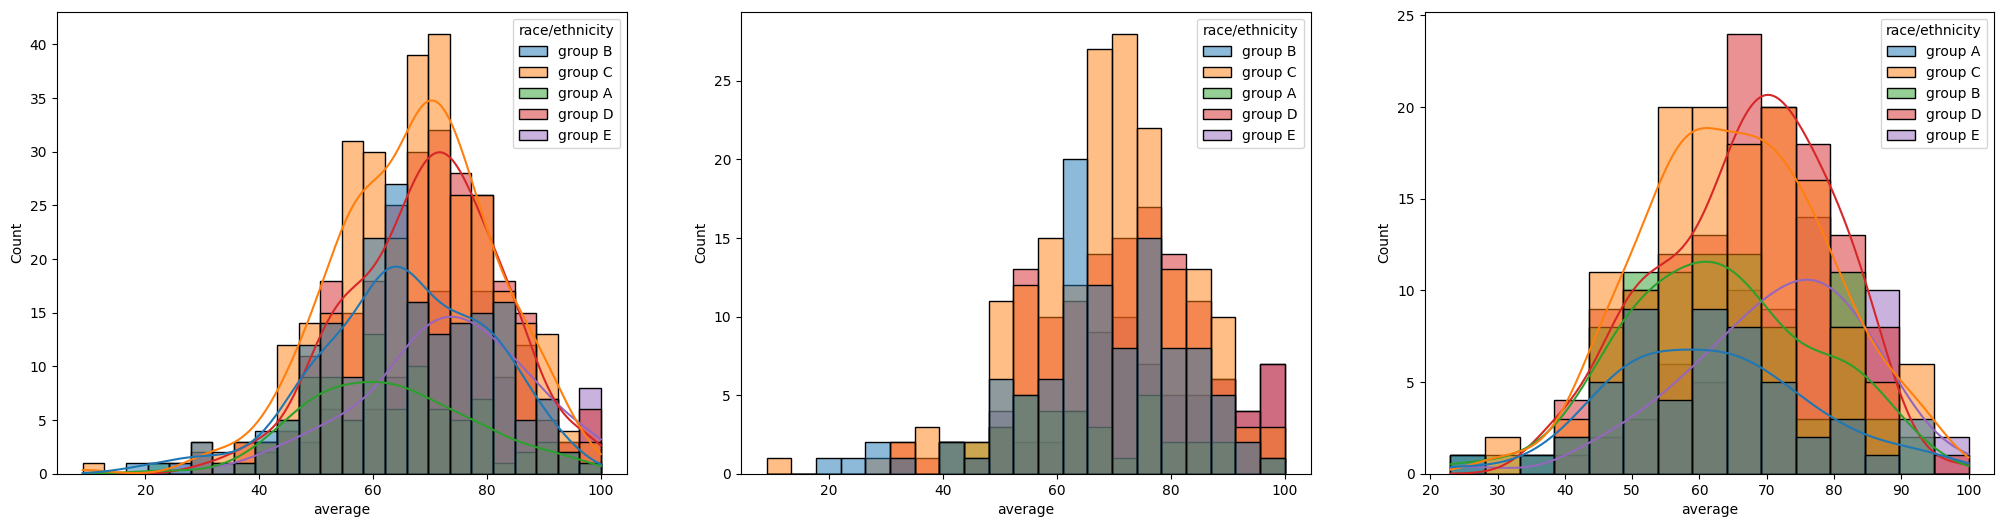

In [59]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax = sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax = sns.histplot(data=df[df.gender=='female'],x='average',hue='race/ethnicity')
plt.subplot(133)
ax = sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

Observaciones
* Los estudiantes del grupo A y del grupo B tienden a tener un mal desempeño en el examen
* Los estudiantes del grupo A y del grupo B tienden a tener un mal desempeño en el examen, independientemente de si son hombre o mujeres

#### 4.2 Puntuación máxima de los estudiantes en las tres asignaturas

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORE')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

Observaciones
* De los tres gráficos anteriores, es claramente visible que la mayoria de los estudiantes obtienen puntuaciones entre 60 y 80 en matematicas, mientras que en lectura y escritura la mayoría obtiene puntuaciones entre 50 y 80

#### 4.3 Análisis multivariado utilizando grafico circular

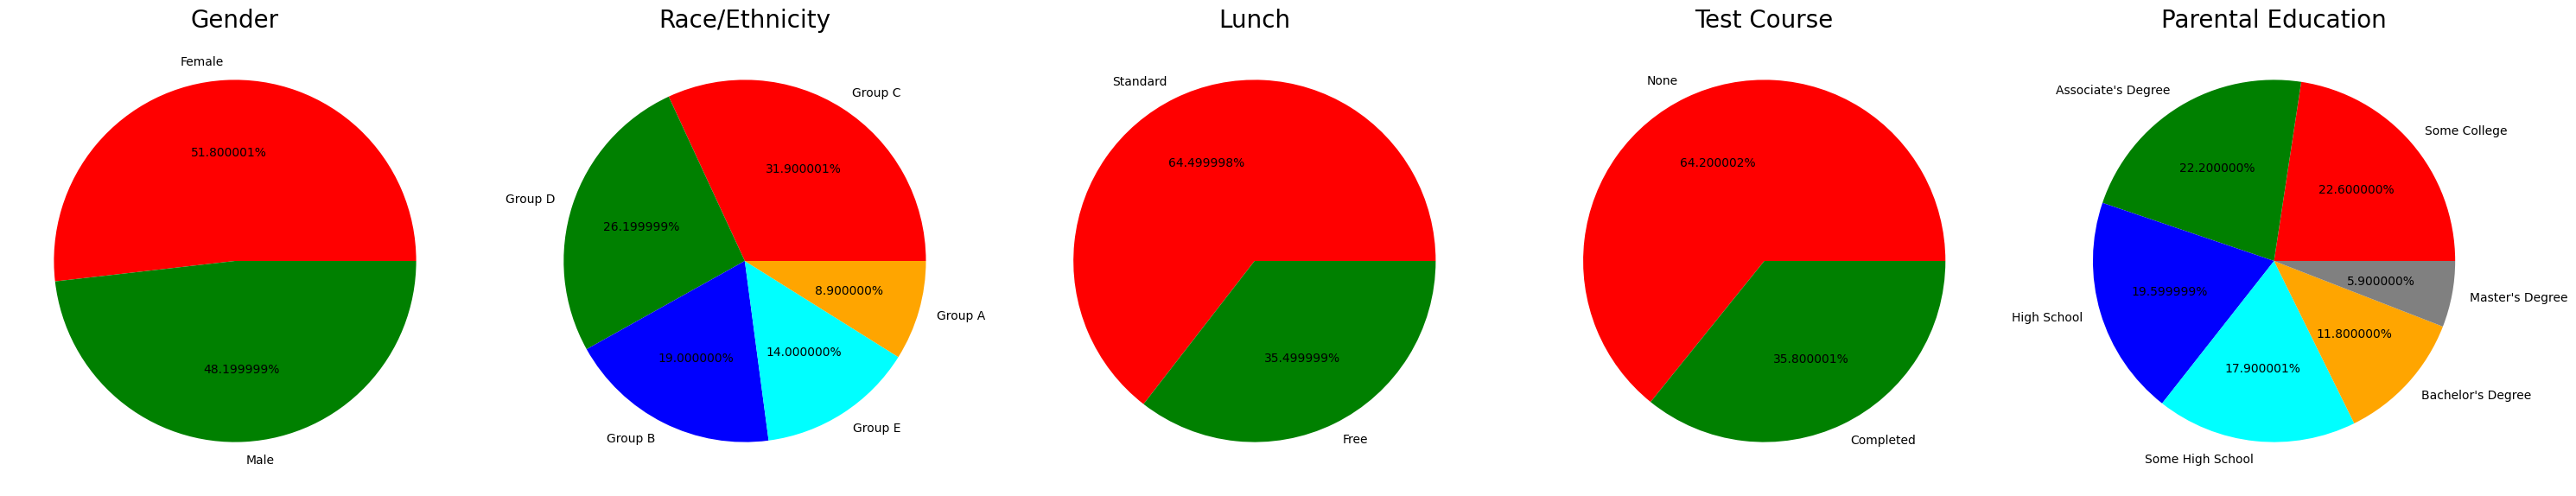

In [69]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female','Male'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard','Free'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test preparation course'].value_counts()
labels = 'None','Completed'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Test Course',fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental level of education'].value_counts()
labels = "Some College", "Associate's Degree","High School","Some High School","Bachelor's Degree","Master's Degree"
color = ['red','green','blue','cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='%2f%%')
plt.title('Parental Education',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()

Observaciones
* El número de estudianes masculinos y femeninos es casi igual
* La cantidad de estudiantes es mayor en el grupo C
* Hay más estudiantes que tiene almuerzo estándar
* La cantidad de estudiantes que no se han inscripto en ningún curso de preparación para el examen es mayor
* La cantidad de estudiantes cuya educación de los padres es "Some College" es mayor, seguida de cerca por "Associate's Degree"

### 4.4 Visualización por características

#### 4.4.1 Columna de Género
* ¿Cómo está distribuido el género?
* ¿El género tiene algún impacto en el rendimiento de los estudiantes?

#### Análisis univariado (¿Cómo está distribuido el género?)

C:\Users\more_\AppData\Local\Temp\ipykernel_22496\1720327845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


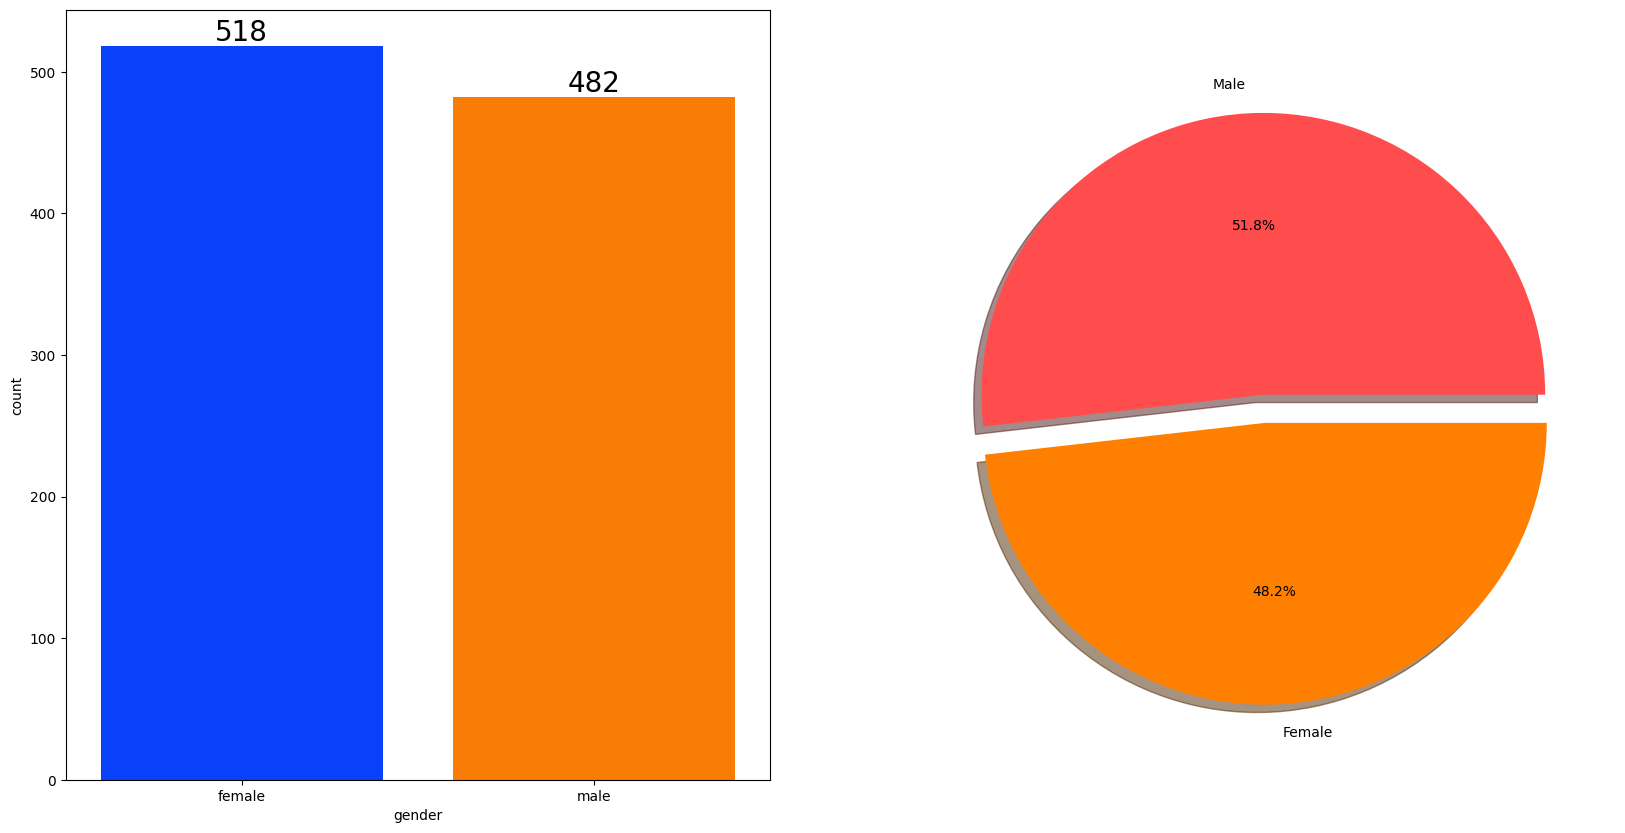

In [73]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

Observaciones
* El género tiene datos equilibrados con 518 estudiantes femeninas (48%) y 482 estudiantes masculinos (52%)

#### Análisis bivariado(¿Tiene el género algún impacto en el rendimiento de los estudiantes?)

In [ ]:
numeric_cols = df.select_dtypes(include=['number']).columns
gender_group = df.groupby('gender')[numeric_cols].mean()
gender_group

In [ ]:
plt.figure(figsize=(10,8))
X = ['Total Average','Math Average']

female_scores = [gender_group['average'][0],gender_group['math score'][0]]
male_scores = [gender_group['average'][1],gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2,male_scores,0.4,label='Male')
plt.bar(X_axis + 0.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel('Marks')
plt.title('Total average v/s Math average marks of bith the genders',fontweight='bold')
plt.legend()
plt.show()

Observaciones
* En promedio, las mujeres tienen una mejor puntuación general que los hombres
* Mientras que los hombres han obtenido puntuacion mas altas en matematicas

#### 4.4.2 Columna de Race/Ethnicity
* ¿Cómo es la distribución por grupo?
* ¿Tiene la raza/ethnicidad algún impacto en el rendimientos de los estudiantes?

##### Análisis univariado (¿Cómo es la distribución por grupo?)

In [ ]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,hue='race/ethnicity',ax=ax[0],saturation=0.95,legend=False)
for contrainer in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

Observaciones
* La mayoría de los estudiantes pertenecen al grupo C/grupo D
* El menor número de estudiantes pertenece al grupo A

##### Análisis bivariado(¿Tiene la raza/etnicidad algún impacto en el rendimiento de los estudiantes?)

In [ ]:
Group_data2 = df.groupby('race/ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20, 8))

sns.barplot(x=Group_data2['math score'].mean().index, y=Group_data2['math score'].mean().values, hue=Group_data2['math score'].mean().index, palette='mako', ax=ax[0], legend=False)
ax[0].set_title('Math score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['reading score'].mean().index, y=Group_data2['reading score'].mean().values, hue=Group_data2['reading score'].mean().index, palette='flare', ax=ax[1], legend=False)
ax[1].set_title('Reading score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['writing score'].mean().index, y=Group_data2['writing score'].mean().values, hue=Group_data2['writing score'].mean().index, palette='coolwarm', ax=ax[2], legend=False)
ax[2].set_title('Writing score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

plt.show()


Observaciones
* Los estudiantes del grupo E han obtenido las calificaciones más altas
* Los estudiantes del grupo A has obtenido las calificaciones más bajas
* Los estudiantes de un nivel socioeconómico más bajo tienen un promedio más bajo en todas las asignaturas

##### Análisis univariable (¿Cuál es el nivel educativo de los padres de los estudiantes?)

In [ ]:

plt.rcParams['figure.figsize']=(15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(x=df['parental level of education'],hue=df['gender'], palette='Blues',saturation=0.95)
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Observaciones
* El mayor número de padres tienen un nivel universitario

##### Análisis bivariado (¿La educación de los padres tiene algún impacto en el rendimiento de los estudiantes?)

In [ ]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Observaciones
* Los puntajes de los estudiantes cuyos padres tienen educación a nivel maestría y licenciatura son más altos que los demás

#### 4.4.4 Columna de almuerzo

* ¿Qué tipo de almuerzo es más común entre los estudiantes?
* ¿Cuál es el efecto del tipo de almuerzo en los resultados de las pruebas?

##### Análisis univariado (¿Qué tipo de almuerzo es más común entre los estudiantes?)

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.set_style('whitegrid')
sns.countplot(x='lunch', data=df, palette='PuBu', hue='lunch', legend=False)
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of lunch')
plt.ylabel('Count')
plt.show()

Observaciones
* El número de estudiantes que reciben almuerzo estándar fue mayor que el de almuerzo gratuito.


##### ANÁLISIS BIVARIADO ( ¿El tipo de almuerzo tiene algún impacto en el rendimiento de los estudiantes? )

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

Observaciones
* Los estudiantes que reciben almuerzo estándar tienden a rendir mejor que los estudiantes que reciben almuerzo gratuito/reducido.

#### 4.4.5 COLUMNAS DEL CURSO DE PREPARACIÓN PARA EXÁMENES
* ¿Qué tipo de almuerzo es más común entre los estudiantes?
* ¿Tiene el curso de preparación para exámenes algún impacto en el rendimiento de los estudiantes?


##### Análisis bivariado ( ¿El curso de preparación para exámenes tiene algún impacto en el rendimiento de los estudiantes? )

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

Observaciones
* Los estudiantes que han completado el Curso de Preparación para Exámenes obtienen puntajes más altos en las tres categorías que aquellos que no han tomado el curso.

#### 4.4.6 DETECCIÓN DE VALORES ATÍPICOS

In [ ]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 Análisis Multivariado Utilizando Pairplot

In [ ]:
sns.pairplot(df,hue = 'gender')
plt.show()

Observaciones
* A partir del gráfico anterior, queda claro que todas las puntuaciones aumentan linealmente entre sí.

#### 5. Conclusiones
* El rendimiento de los estudiantes está relacionado con el almuerzo, la raza y el nivel educativo de los padres.
* Las mujeres lideran en el porcentaje de aprobación y también son las que obtienen las mejores calificaciones.
* El rendimiento de los estudiantes no está muy relacionado con el curso de preparación para exámenes.
* Completar el curso de preparación es beneficioso.